In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('US_COVID-19')

In [3]:
data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [4]:
data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [5]:
data.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [6]:
data.shape

(58, 18)

In [7]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [8]:
data.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [9]:
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [10]:
df=data.replace(np.NaN,0)


In [11]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [12]:
#From the above we see the null values removed

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   58 non-null     float64
 4   Long_                 58 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         58 non-null     float64
 11  People_Tested         58 non-null     float64
 12  People_Hospitalized   58 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

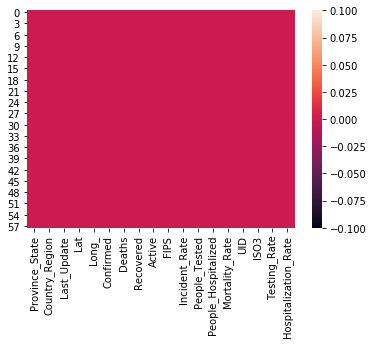

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [16]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,35.569741,-82.268455,26756.086207,1611.017241,5074.344828,20070.724138,3288.086207,382.567674,2.180654e+05,2786.482759,4.381382,7.676194e+07,3759.904564,8.160412
std,12.662834,51.328392,52562.031122,4084.750891,10393.125384,41294.705318,17408.350591,402.221849,2.964241e+05,10177.988015,2.195667,2.378302e+07,2029.719694,8.101621
min,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.600000e+01,0.000000,0.000000
25%,33.761575,-99.697700,2596.000000,74.000000,0.000000,812.500000,18.250000,139.910412,4.166725e+04,0.000000,2.952622,8.400001e+07,2649.226598,0.000000
50%,38.978600,-86.797300,10148.500000,385.000000,1079.500000,5644.500000,32.500000,244.809981,1.334500e+05,178.500000,4.382399,8.400003e+07,3440.890063,8.403869
75%,42.214075,-75.830850,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,462.828082,2.620348e+05,1722.750000,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [17]:
dfcor=df.corr()
dfcor

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.387390,0.153491,0.141302,0.122877,0.150468,-0.534868,0.301152,0.145980,0.095320,0.169965,0.621164,0.433706,0.244780
Long_,-0.387390,1.000000,-0.020091,0.004367,-0.035159,-0.017156,0.305374,-0.016711,-0.116179,0.016002,0.254080,-0.482885,0.061531,-0.180340
Confirmed,0.153491,-0.020091,1.000000,0.982191,0.756823,0.985218,-0.096696,0.714239,0.829562,0.846476,0.386823,0.153972,0.345215,0.144106
Deaths,0.141302,0.004367,0.982191,1.000000,0.782292,0.954378,-0.075053,0.711955,0.742859,0.888548,0.425715,0.120043,0.348798,0.164596
Recovered,0.122877,-0.035159,0.756823,0.782292,1.000000,0.634259,-0.092894,0.527055,0.601959,0.688997,0.312402,0.150011,0.284562,0.067486
Active,0.150468,-0.017156,0.985218,0.954378,0.634259,1.000000,-0.092276,0.706045,0.830926,0.816137,0.371632,0.146354,0.333286,0.150159
FIPS,-0.534868,0.305374,-0.096696,-0.075053,-0.092894,-0.092276,1.000000,-0.181226,-0.140195,-0.052146,-0.246082,0.058022,-0.352595,-0.191941
Incident_Rate,0.301152,-0.016711,0.714239,0.711955,0.527055,0.706045,-0.181226,1.000000,0.455484,0.534802,0.416559,0.249272,0.635041,0.122181
People_Tested,0.145980,-0.116179,0.829562,0.742859,0.601959,0.830926,-0.140195,0.455484,1.000000,0.611581,0.272874,0.225064,0.263276,0.096457
People_Hospitalized,0.095320,0.016002,0.846476,0.888548,0.688997,0.816137,-0.052146,0.534802,0.611581,1.000000,0.286447,0.084782,0.281492,0.383666


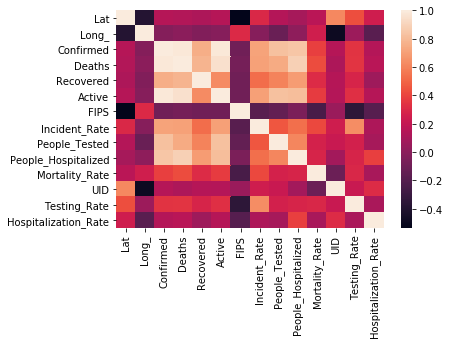

In [18]:
sns.heatmap(dfcor)

In [19]:
dft=pd.DataFrame(df)

In [20]:
dft

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017,0.000000
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246,0.000000
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,0.0,4.066421,84000006,USA,3492.893832,0.000000
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,0.0,3.783256,84000010,USA,4663.552976,0.000000
9,Diamond Princess,US,2020-05-21 02:32:54,0.0000,0.0000,49,0,0.0,49.0,88888,0.000000,0.0,0.0,0.000000,84088888,USA,0.000000,0.000000


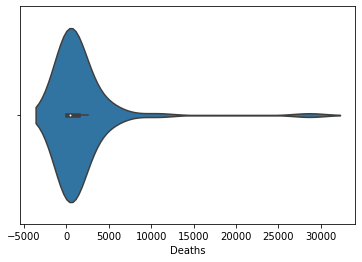

In [21]:
sns.violinplot(x='Deaths',data=dft)
plt.show()

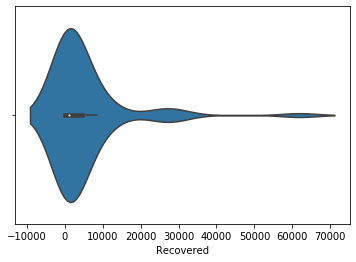

In [22]:
sns.violinplot(x='Recovered',data=dft)
plt.show()

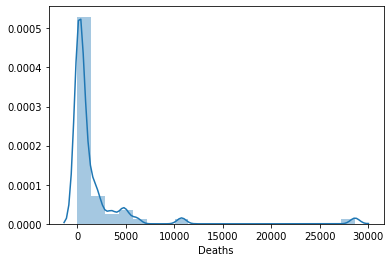

In [23]:
sns.distplot(dft['Deaths'],bins=20)
plt.show()

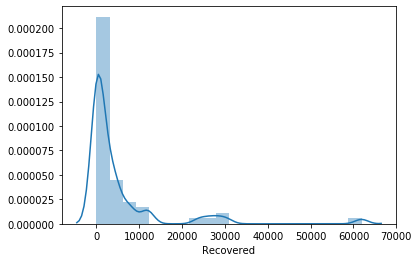

In [24]:
sns.distplot(dft['Recovered'],bins=20)
plt.show()

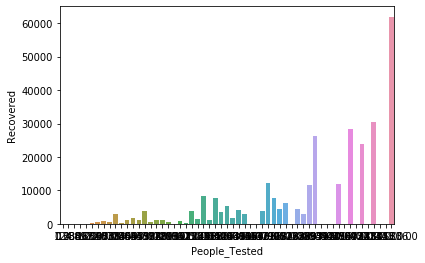

In [25]:
sns.barplot(x="People_Tested",y="Recovered",data=dft)
plt.show()

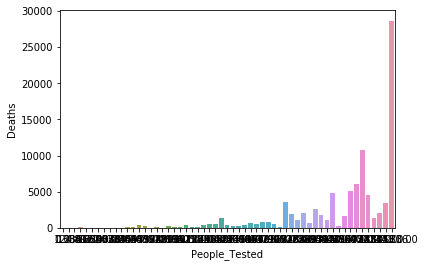

In [26]:
sns.barplot(x="People_Tested",y="Deaths",data=dft)
plt.show()

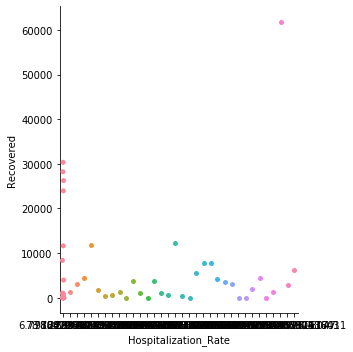

In [27]:
sns.catplot(x='Hospitalization_Rate',y='Recovered',data=dft)

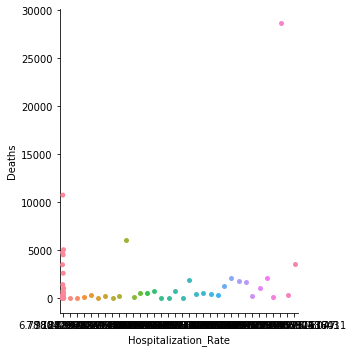

In [28]:
sns.catplot(x='Hospitalization_Rate',y='Deaths',data=dft)

In [29]:
dft.skew()

Lat                    -1.937509
Long_                   3.068318
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.649556
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.961954
People_Tested           2.812214
People_Hospitalized     6.885993
Mortality_Rate          0.400879
UID                    -3.027480
Testing_Rate            1.024775
Hospitalization_Rate    0.407078
dtype: float64

In [30]:
# Treating using log
skew = ('Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID',
       'Testing_Rate', 'Hospitalization_Rate')

for col in skew:
    if dft.skew().loc[col]>0.55:
        dft[col]=np.log1p(dft[col])


C:\Users\Ruchi\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
dft.skew()

Lat                    -1.937509
Long_                   0.000004
Confirmed              -1.374603
Deaths                 -0.568714
Recovered              -0.591539
Active                 -0.994488
FIPS                    3.421540
Incident_Rate          -2.038061
People_Tested          -2.758023
People_Hospitalized     0.015409
Mortality_Rate          0.400879
UID                    -3.027480
Testing_Rate           -3.989575
Hospitalization_Rate    0.407078
dtype: float64

In [32]:
#Skewness is removed

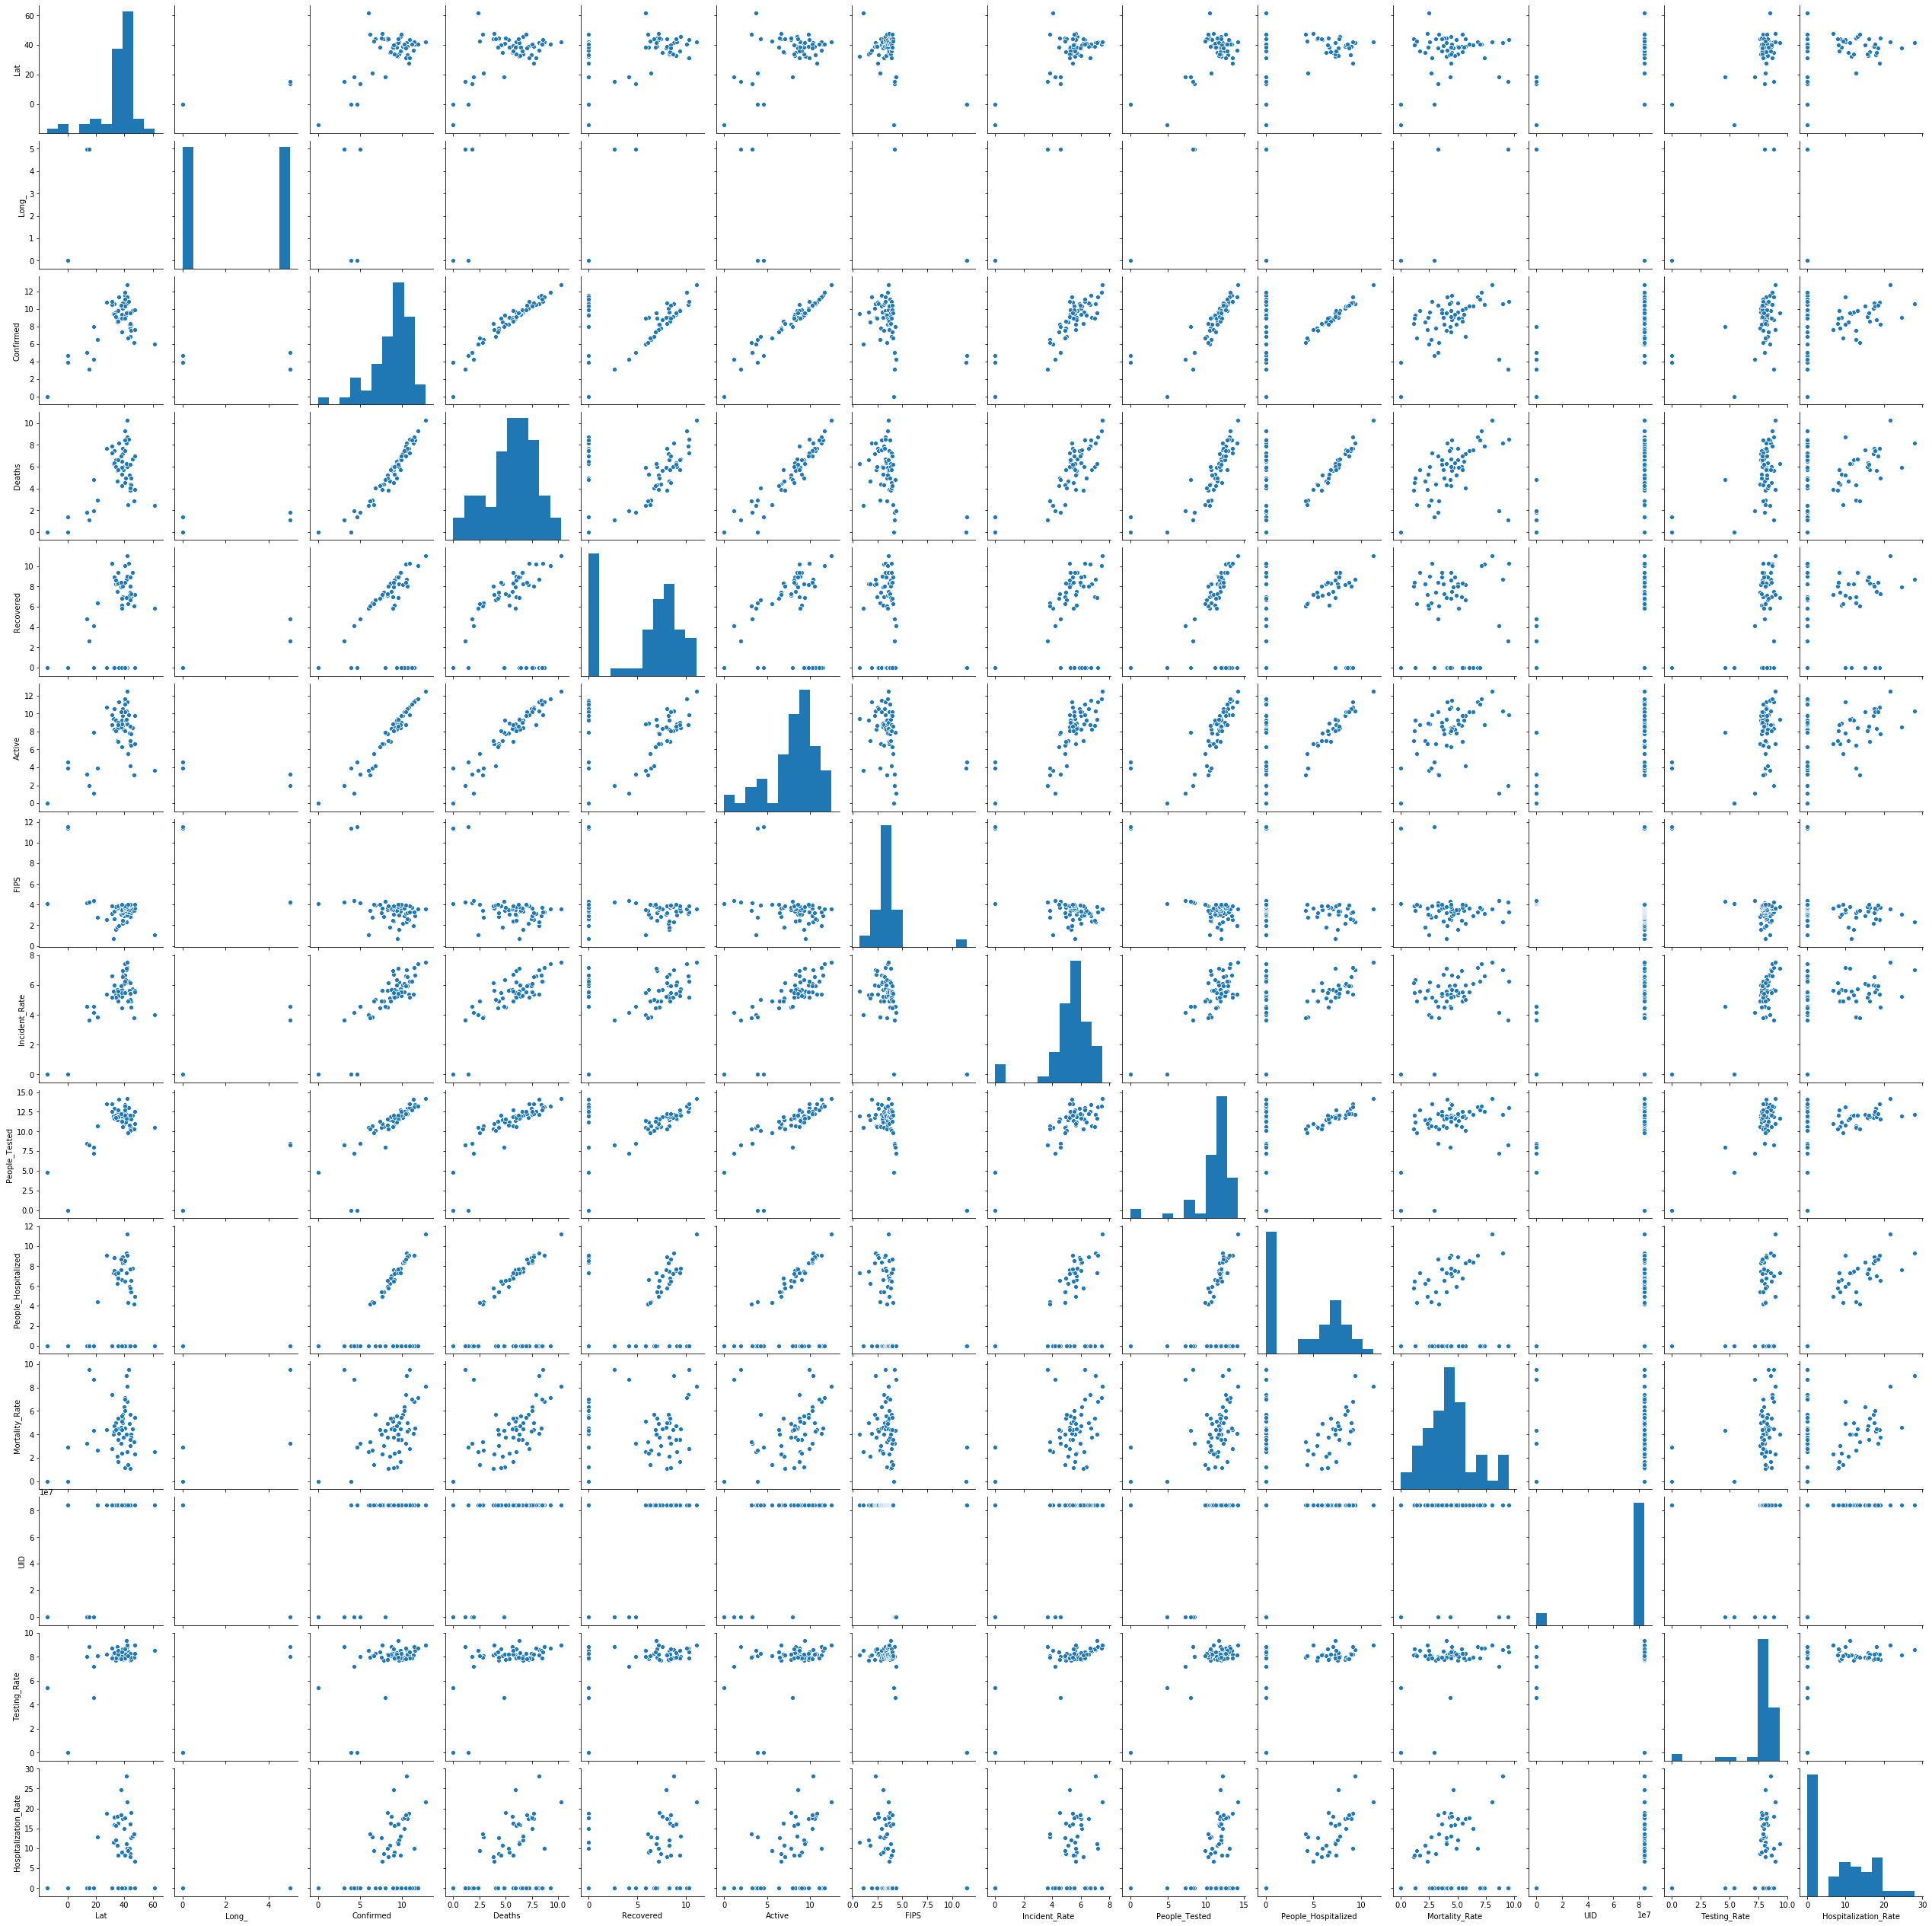

In [33]:
sns.pairplot(dft)

In [34]:
dft.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed               float64
Deaths                  float64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [35]:
#I am applying labelEncoder to change the datatype

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dft['Province_State']=le.fit_transform(dft['Province_State'])
dft['Country_Region']=le.fit_transform(dft['Country_Region'])
dft['Last_Update']=le.fit_transform(dft['Last_Update'])
dft['ISO3']=le.fit_transform(dft['ISO3'])



In [37]:
dft.dtypes

Province_State            int32
Country_Region            int32
Last_Update               int32
Lat                     float64
Long_                   float64
Confirmed               float64
Deaths                  float64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [39]:
#Now the datatype is changed 

In [41]:
#No saperating the x and y for prediction of recovered 

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dft)
x=pd.DataFrame(x,columns=dft.columns)

In [43]:
x
x.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,-1.702441,0.0,0.0,-0.259021,NaN,0.321337,0.293758,-1.495656,0.535925,-1.706383,0.183601,0.346079,0.850743,-0.175496,0.306995,0.217199,0.179359,0.408200
1,-1.642706,0.0,0.0,2.055330,NaN,-1.170832,-1.395188,0.067601,-1.557578,-1.465219,-0.844344,-0.213900,-1.089049,-0.867209,0.306995,0.217199,0.430779,-1.016054
2,-1.582971,0.0,0.0,-3.970362,NaN,-3.741780,-2.443930,-1.495656,-2.901336,0.326424,-3.484605,-2.352298,-1.089049,-2.012895,-3.255783,-5.381703,-1.473054,-1.016054
3,-1.523237,0.0,0.0,-0.146572,NaN,0.378280,0.450255,0.698988,0.467570,-1.161389,0.012187,0.348323,0.899159,0.289445,0.306995,0.217199,-0.058053,0.480807
4,-1.463502,0.0,0.0,-0.047800,NaN,-0.089735,-0.396155,0.704509,-0.368996,-1.052947,-0.125771,0.144860,0.578698,-1.030326,0.306995,0.217199,0.148715,0.315406


In [59]:
x.drop('Long_', axis = 1, inplace = True) 
x.drop ('Country_Region', axis = 1, inplace = True)
x.drop ('Last_Update', axis = 1, inplace = True)

In [60]:
#Since Long_ have NaN value so i am droping that column

In [61]:
y=df.iloc[:,-11]
y.head()

0       0.0
1     352.0
2       0.0
3    3773.0
4    3852.0
Name: Recovered, dtype: float64

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([ 0,  5,  0, 24, 25,  0, 23, 31, 26,  0, 13,  0,  0,  0,  3,  9, 18,
        0,  0, 34,  7, 20, 39, 14, 21,  0, 40, 37, 32,  0,  6,  0,  4, 15,
       38, 19, 42, 35, 16,  1,  0, 27, 17,  0,  0, 12, 30, 22, 36, 41, 28,
       10,  2, 29,  0, 11, 33,  8], dtype=int64)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y,random_state = 55,test_size=0.20)

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr= linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    

max r2 score corresponding to  83  is  0.9417548978538137


In [65]:
# Lets perform the cross_validation 
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression() ,x,y,cv=5,scoring='r2').mean()
#it will calculate the 5 score and find the mean of that 

0.38061694320853434

In [66]:
#since maximum r2 score is comming around random state 50 we will use that to create our final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=83,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [67]:
import numpy as np
print('r2 score is: ',r2_score(y_test,y_pred))
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9417548978538137
RMSE is:  3.9354718818074863


In [81]:
#On linear model at 83 i am getting best score 94 so i am saving the model

In [82]:
from sklearn.externals import joblib
# Save the model as a pickle in a file 
joblib.dump(lr,'lr_US_COVID-19.pkl')

['lr_US_COVID-19.pkl']

# Now Predicting for the Deadths

In [83]:
dft

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,0,32.3182,NaN,9.476773,6.259581,0.000000,9.435961,0.693147,5.587976,12.010368,7.309212,3.999387,84000001,4,8.118190,11.438860
1,1,0,0,61.3707,NaN,5.996452,2.397895,5.866468,3.688879,1.098612,4.022051,10.519916,0.000000,2.493766,84000002,4,8.530098,0.000000
2,2,0,0,-14.2710,NaN,0.000000,0.000000,0.000000,0.000000,4.110874,0.000000,4.828314,0.000000,0.000000,16,0,5.411009,0.000000
3,3,0,0,33.7298,NaN,9.609586,6.617403,8.235891,9.248310,1.609438,5.326851,12.016340,7.491645,5.011405,84000004,4,7.729234,12.022005
4,4,0,0,34.9697,NaN,8.517993,4.682131,8.256607,6.951772,1.791759,5.116692,11.474798,6.284134,2.138717,84000005,4,8.067986,10.693584
5,5,0,0,36.1162,NaN,11.362079,8.159947,0.000000,11.320566,1.945910,5.387457,14.137682,0.000000,4.066421,84000006,4,8.158772,0.000000
6,6,0,0,39.0598,NaN,10.034428,7.170120,8.154500,9.799293,2.197225,5.983604,11.789329,8.282989,5.698118,84000008,4,7.736455,17.348774
7,7,0,0,41.5978,NaN,10.571778,8.169053,8.742734,10.282780,2.302585,6.998836,12.158556,9.300821,9.044775,84000009,4,8.584908,28.054438
8,8,0,0,39.3185,NaN,9.011279,5.739793,8.285513,8.273847,2.397895,6.736346,10.723554,0.000000,3.783256,84000010,4,8.447747,0.000000
9,9,0,0,0.0000,0.000000,3.912023,0.000000,0.000000,3.912023,11.395144,0.000000,0.000000,0.000000,0.000000,84088888,4,0.000000,0.000000


In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dft)
x=pd.DataFrame(x,columns=dft.columns)

In [85]:
x

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,-1.702441,0.0,0.0,-0.259021,NaN,0.321337,0.293758,-1.495656,0.535925,-1.706383,0.183601,0.346079,0.850743,-0.175496,0.306995,0.217199,0.179359,0.408200
1,-1.642706,0.0,0.0,2.055330,NaN,-1.170832,-1.395188,0.067601,-1.557578,-1.465219,-0.844344,-0.213900,-1.089049,-0.867209,0.306995,0.217199,0.430779,-1.016054
2,-1.582971,0.0,0.0,-3.970362,NaN,-3.741780,-2.443930,-1.495656,-2.901336,0.326424,-3.484605,-2.352298,-1.089049,-2.012895,-3.255783,-5.381703,-1.473054,-1.016054
3,-1.523237,0.0,0.0,-0.146572,NaN,0.378280,0.450255,0.698988,0.467570,-1.161389,0.012187,0.348323,0.899159,0.289445,0.306995,0.217199,-0.058053,0.480807
4,-1.463502,0.0,0.0,-0.047800,NaN,-0.089735,-0.396155,0.704509,-0.368996,-1.052947,-0.125771,0.144860,0.578698,-1.030326,0.306995,0.217199,0.148715,0.315406
5,-1.403767,0.0,0.0,0.043531,NaN,1.129653,1.124901,-1.495656,1.222435,-0.961260,0.051971,1.145334,-1.089049,-0.144699,0.306995,0.217199,0.204129,-1.016054
6,-1.344032,0.0,0.0,0.278021,NaN,0.560429,0.691991,0.677300,0.668277,-0.811783,0.443310,0.263032,1.109174,0.604935,0.306995,0.217199,-0.053645,1.144044
7,-1.284298,0.0,0.0,0.480201,NaN,0.790815,1.128884,0.834048,0.844398,-0.749116,1.109755,0.401755,1.379297,2.142457,0.306996,0.217199,0.464235,2.477008
8,-1.224563,0.0,0.0,0.298630,NaN,0.121759,0.066424,0.712211,0.112599,-0.692427,0.937445,-0.137391,-1.089049,-0.274791,0.306996,0.217199,0.380514,-1.016054
9,-1.164828,0.0,0.0,-2.833521,-1.000000,-2.064520,-2.443930,-1.495656,-1.476293,4.658986,-3.484605,-4.166349,-1.089049,-2.012895,0.310765,0.217199,-4.775833,-1.016054


In [86]:
x.drop('Long_', axis = 1, inplace = True) 
x.drop ('Country_Region', axis = 1, inplace = True)
x.drop ('Last_Update', axis = 1, inplace = True)

In [87]:
y=df.iloc[:,-12]
y.head()

0    84000001
1    84000002
2          16
3    84000004
4    84000005
Name: Deaths, dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([ 5,  6,  0,  7,  8,  9, 10, 11, 12, 56, 13, 14, 15, 57,  1, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39,  2, 40, 41, 42, 43,  3, 44, 45, 46, 47, 48, 49,
       50,  4, 51, 52, 53, 54, 55], dtype=int64)

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y,random_state = 55,test_size=0.20)

In [90]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr= linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    

max r2 score corresponding to  75  is  0.9952680000648251


In [91]:
# Lets perform the cross_validation 
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression() ,x,y,cv=5,scoring='r2').mean()
#it will calculate the 5 score and find the mean of that 

0.5973434161788347

In [92]:
#since maximum r2 score is comming around random state 50 we will use that to create our final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [93]:
import numpy as np
print('r2 score is: ',r2_score(y_test,y_pred))
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9952680000648251
RMSE is:  1.1320123105929116


In [95]:
#On linear model at 75 i am getting best score 99 so i am saving the model

In [96]:
from sklearn.externals import joblib
# Save the model as a pickle in a file 
joblib.dump(lr,'lr_US_COVID-19_Deaths.pkl')

['lr_US_COVID-19_Deaths.pkl']